In [2]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
data=pd.read_excel('C:Downloads/nptel-DA/Simmons.xls')
data

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0
...,...,...,...,...
95,96,3.318,0,0
96,97,2.421,1,0
97,98,6.073,0,0
98,99,2.630,1,0


In [3]:
x=data[['Spending','Card']]
y=data['Coupon'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
len(x_train),len(x_test),len(y_train),len(y_test)

(75, 25, 75, 25)

In [4]:
data.describe()

,Customer,Spending,Card,Coupon
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.333790,0.500000,0.400000
std,29.011492,1.741298,0.502519,0.492366
min,1.000000,1.058000,0.000000,0.000000
25%,25.750000,2.059000,0.000000,0.000000
50%,50.500000,2.805500,0.500000,0.000000
75%,75.250000,4.468250,1.000000,1.000000
max,100.000000,7.076000,1.000000,1.000000


In [5]:
data['Coupon'].unique()

array([0, 1], dtype=int64)

In [6]:
data['Coupon'].value_counts()

0    60
1    40
Name: Coupon, dtype: int64

In [7]:
Lreg=LogisticRegression(solver='lbfgs')
Lreg.fit(x_train,y_train.ravel())

LogisticRegression()

In [8]:
y_predict=Lreg.predict(x_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [18]:
y_predict_train=Lreg.predict(x_train)
y_predit_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [19]:
y_prob=Lreg.predict_proba(x_test)[:,1]
y_prob.reshape(1,-1)

array([[0.52802946, 0.49516653, 0.45703306, 0.27712052, 0.34390047,
        0.26825171, 0.27712052, 0.607686  , 0.42836534, 0.43637155,
        0.31387455, 0.23676248, 0.45703306, 0.43602768, 0.37596116,
        0.44900317, 0.46952365, 0.68521935, 0.25167254, 0.47073304,
        0.42361093, 0.56580644, 0.52792177, 0.40302605, 0.27457435]])

In [20]:
y_prob_train=Lreg.predict_proba(x_train)[:,1]
y_prob_train.reshape(1,-1)

array([[0.49622117, 0.32880793, 0.44329114, 0.33320924, 0.41456465,
        0.32890329, 0.3975043 , 0.66921229, 0.25844531, 0.63672372,
        0.29274386, 0.28466974, 0.5159296 , 0.41992276, 0.24342356,
        0.528514  , 0.47965107, 0.52805789, 0.33191449, 0.27457435,
        0.49179296, 0.63261616, 0.24690181, 0.47089452, 0.27842076,
        0.41663875, 0.36155602, 0.49970327, 0.23621636, 0.37860052,
        0.48809323, 0.28877877, 0.28563859, 0.37231882, 0.65309742,
        0.43807264, 0.33638478, 0.40406607, 0.23431177, 0.37282384,
        0.49970327, 0.39768396, 0.32880793, 0.25782472, 0.47393834,
        0.42878861, 0.26520939, 0.33320924, 0.54682499, 0.45446086,
        0.44326597, 0.4965167 , 0.60065954, 0.38989654, 0.49149447,
        0.27414424, 0.27785686, 0.67464141, 0.28195004, 0.48593427,
        0.38633222, 0.31373499, 0.42810085, 0.27418723, 0.44371771,
        0.41629601, 0.642004  , 0.6571001 , 0.44068025, 0.28195004,
        0.40217015, 0.43807264, 0.50977653, 0.57

In [21]:
x1=sm.add_constant(x)
model=sm.Logit(y,x1).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5


C:\Users\Mahendran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sun, 03 Apr 2022   Pseudo R-squ.:                  0.1012
Time:                        06:08:26   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Spending       0.3416      0.129      2.655      0.008       0.089       0.594
Card           1.0987      0.445      2.471      0.013       0.227       1.970
==============================================================================
"""

In [22]:
from sklearn.metrics import accuracy_score as acs
score=acs(y_test,y_predict)
score

0.76

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[15,  1],
       [ 5,  4]], dtype=int64)

In [24]:
tnr,fpr,fnr,tpr=confusion_matrix(y_test,y_predict).ravel()

In [25]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



# Performance of Logistic Regression

In [35]:
accuracy=(tpr+tnr)/(tpr+tnr+fpr+fnr)
accuracy

0.76

In [37]:
sensitivity=tpr/(tpr+fnr)
sensitivity

0.4444444444444444

In [38]:
specificity=tnr/(tnr+fpr)
specificity

0.9375

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
Auc_Roc_1=roc_auc_score(y_train,y_predict_train)
fpr1,tpr1,threshold=roc_curve(y_train,y_prob_train)
roc_auc1=auc(fpr1,tpr1)
Auc_Roc_1,roc_auc1

(0.6158357771260996, 0.6392961876832844)

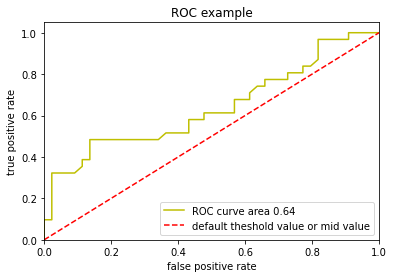

In [98]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr1,tpr1,color='y',label='ROC curve area %0.2f'%roc_auc1)
plt.plot([0,1],[0,1],'r--',label='default theshold value or mid value')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC example')
plt.legend(loc='lower right')
plt.show()

In [99]:
AOc_Roc_2=roc_auc_score(y_test,y_predict)
fpr2,tpr2,threshold2=roc_curve(y_test,y_prob)
roc_auc2=auc(fpr2,tpr2)
roc_auc2

0.9027777777777777

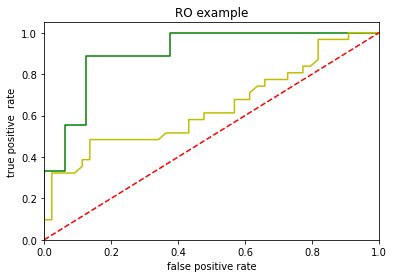

In [100]:
plt.figure()
plt.plot(fpr2,tpr2,color='g',label='ROC curve area=%0.2f'%roc_auc2)
plt.plot(fpr1,tpr1,color='y',label='ROC curve area %0.2f'%roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive  rate')
plt.title('RO example')
plt.show()

In [50]:
from sklearn.preprocessing import binarize
y_predict_class1=binarize(y_prob.reshape(1,-1),0.35)[0]
y_predict_class1

C:\Users\Mahendran\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.35 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0.])

In [51]:
y_predict_class1=y_predict_class1.astype(int)
y_predict_class1

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0])

In [55]:
cfm=confusion_matrix(y_test,y_predict_class1)
cfr=classification_report(y_test,y_predict_class1)
print(cfm)
print(cfr)

[[8 8]
 [0 9]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        16
           1       0.53      1.00      0.69         9

    accuracy                           0.68        25
   macro avg       0.76      0.75      0.68        25
weighted avg       0.83      0.68      0.68        25



In [61]:
y_predict_class2=binarize(y_prob.reshape(1,-1),0.5)[0]
y_predict_class2=y_predict_class2.astype(int)
y_predict_class2

C:\Users\Mahendran\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0])

In [62]:
cfm=confusion_matrix(y_test,y_predict_class2)
cfr=classification_report(y_test,y_predict_class2)
print(cfm)
print(cfr)

[[15  1]
 [ 5  4]]
              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



In [70]:
y_predict_class3=binarize(y_prob.reshape(1,-1),threshold=0.70)[0]
y_predict_class3=y_predict_class3.astype(int)
cfm=confusion_matrix(y_test,y_predict_class3)
cfr=classification_report(y_test,y_predict_class3)
print(cfm)
print(cfr)

[[16  0]
 [ 9  0]]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        16
           1       0.00      0.00      0.00         9

    accuracy                           0.64        25
   macro avg       0.32      0.50      0.39        25
weighted avg       0.41      0.64      0.50        25



C:\Users\Mahendran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mahendran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mahendran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Calculate Optimal Threshold value

In [83]:
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
thresholds

array([1.68521935, 0.68521935, 0.56580644, 0.52802946, 0.49516653,
       0.47073304, 0.46952365, 0.45703306, 0.42836534, 0.42361093,
       0.31387455, 0.27712052, 0.23676248])

In [95]:
i=np.arange(len(tpr))
roc=pd.DataFrame({'fpr':pd.Series(fpr,index=i),'tpr':pd.Series(tpr,index=i),'1-fpr':pd.Series(1-fpr,index=i),'tf':pd.Series(tpr-(1-fpr),index=i),'thresholds':pd.Series(thresholds,index=i)})
roc.iloc[(roc.tf-0).abs().argsort()][:1]
 # extracting roc values against different thresholds 
# roc = pd.DataFrame({'fpr':fpr1, 'tpr':tpr1, 'tf':(tpr1-1+fpr1), 'thresholds':thresholds1}, index=i)

,fpr,tpr,1-fpr,tf,thresholds
7,0.125,0.888889,0.875,0.013889,0.457033


In [85]:
roc

,fpr,tpr,1-fpr,tf,thresholds
0,0.0000,0.000000,1.0000,-1.000000,1.685219
1,0.0000,0.111111,1.0000,-0.888889,0.685219
2,0.0000,0.333333,1.0000,-0.666667,0.565806
3,0.0625,0.333333,0.9375,-0.604167,0.528029
4,0.0625,0.555556,0.9375,-0.381944,0.495167
5,0.1250,0.555556,0.8750,-0.319444,0.470733
6,0.1250,0.666667,0.8750,-0.208333,0.469524
7,0.1250,0.888889,0.8750,0.013889,0.457033
8,0.3750,0.888889,0.6250,0.263889,0.428365
9,0.3750,1.000000,0.6250,0.375000,0.423611


In [90]:
i=np.arange(len(tpr))
roc=pd.DataFrame({'thresholds':pd.Series(thresholds,index=i)})
roc.iloc[(roc).abs().argsort()]

AttributeError: 'DataFrame' object has no attribute 'argsort'

In [96]:
y_predict_class3=binarize(y_prob.reshape(1,-1),threshold=0.4570)[0]
y_predict_class3=y_predict_class3.astype(int)
cfm=confusion_matrix(y_test,y_predict_class3)
cfr=classification_report(y_test,y_predict_class3)
print(cfm)
print(cfr)

[[14  2]
 [ 1  8]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.80      0.89      0.84         9

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.87        25
weighted avg       0.89      0.88      0.88        25



In [102]:
roc['tf']

0    -1.000000
1    -0.888889
2    -0.666667
3    -0.604167
4    -0.381944
5    -0.319444
6    -0.208333
7     0.013889
8     0.263889
9     0.375000
10    0.625000
11    0.750000
12    1.000000
Name: tf, dtype: float64

[]

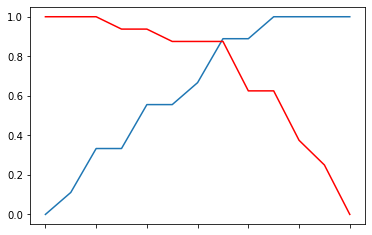

In [105]:
fig,ax=plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'],color='r')
ax.set_xticklabels([])

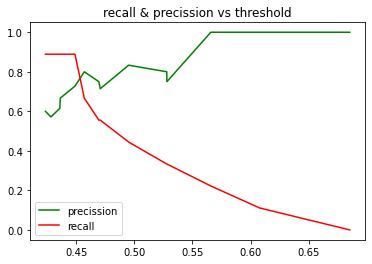

In [108]:
from sklearn import metrics
prc,rec,thr=metrics.precision_recall_curve(y_test,y_prob)
plt.figure()
plt.plot(thr,prc[:-1],label='precission',color='g')
plt.plot(thr,rec[1:],label='recall',color='r')
plt.title('recall & precission vs threshold')
plt.legend()
plt.show()#to predict exact optimized threshold value